<a href="https://colab.research.google.com/github/MochNad/Pembelajaran-Mesin/blob/main/Job_Sheet_3_(Tugas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Pembelajaran Mesi - Job Sheet 3: Regresion**
*   Nama : Moch. Nadi Rafli Maulana
*   NIM : 2141720188
*   No. Absen : 18
*   Kelas : TI-3B
*   Jurusan / Prodi : Teknologi Informasi / D4 - Teknik Informatika

> **Tugas Praktikum**
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.



> **◀ Langkah 1 - Mengimpor Library dan Dataset**


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df3 = pd.read_csv('/content/sample_data/insurance.csv')
df3

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


> **◀ Langkah 2 - Identifikasi Variabel**

> Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

In [5]:
# Mengetahui jumlah data yang hilang untuk setiap kolom
df3.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Membuat objek dari LabelEncoder
le = LabelEncoder()
# Encoding kolom 'sex'
df3['sex'] = le.fit_transform(df3['sex'])
# Encoding kolom 'smoker'
df3['smoker'] = le.fit_transform(df3['smoker'])

df3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [7]:
# Memisahkan variabel bebas (X) dan variabel target (y)
X = df3[['age', 'sex', 'bmi', 'smoker']]
y = df3['charges']

> **◀ Langkah 3 - Bagi Dataset**

>Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

In [8]:
# Membagi dataset menjadi data latih dan data uji dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

> **◀ Langkah 4 - Feature Scaling**

> Lakukan feature scaling jika diperlukan.

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Hitung statistik dari data pelatihan dan lakukan scaling pada data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Gunakan statistik yang sama untuk melakukan scaling pada data uji
X_test_scaled = scaler.transform(X_test)

> **◀ Langkah 5 - Model Linear Regression**

> Buat model multiple linear regression menggunakan Scikit-Learn.

In [10]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

print(f"Intercept B0: {model.intercept_}")
print(f"Koefisien Regressi: {model.coef_}")

Intercept B0: -10383.166281485255
Koefisien Regressi: [  261.25255897    59.86062694   280.87862889 23988.9276672 ]


> **◀ Langkah 6 - Latih dan Prediksi Data**

> Latih model pada data latih dan lakukan prediksi pada data uji.

In [11]:
# Melakukan prediksi pada data uji
prediksi = model.predict(X_test)

> **◀ Langkah 7 - Evaluasi Model**

> Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung R-squared
r2 = r2_score(y_test, prediksi)

# Menghitung MSE
mse = mean_squared_error(y_test, prediksi)

# Menghitung mae
mae = mean_absolute_error(y_test, prediksi)

print("R-squared : ", r2)
print("Mean Squared Error : ", mse)
print("Mean Absolute Error : ", mae)

R-squared :  0.7776685855975247
Mean Squared Error :  32282007.760882825
Mean Absolute Error :  3935.6289359462453


> **◀ Langkah 8 - Visualisasi Hasil**

> Visualisasi data uji dan hasil prediksi dalam bentuk scatter plot.

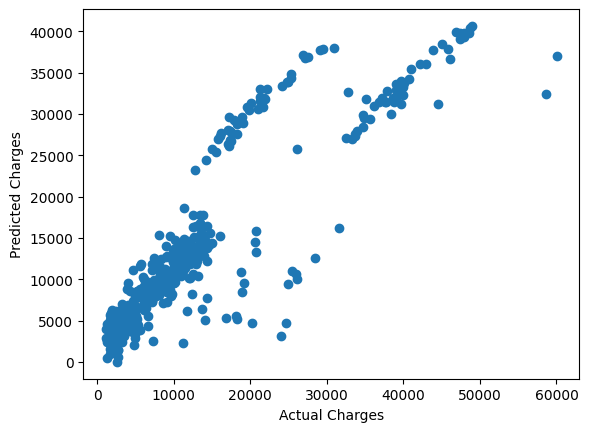

In [13]:
plt.scatter(y_test, prediksi)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()